## 히스토그램
    hist() 함수를 사용
    데이터의 빈도에 따라서 막대 그래프의 높이가 결정된다.
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np

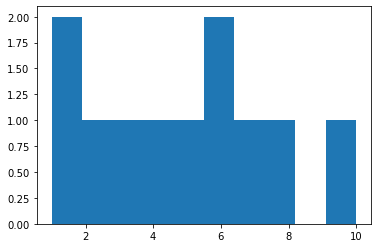

In [2]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10])
plt.show()

In [3]:
dice = []
for i in range(5):
    dice.append(np.random.randint(1,7))

print(dice)

[2, 2, 2, 5, 5]


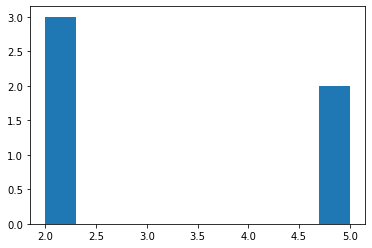

In [4]:
'''
bins
해당 막대 영역을 얼마나 채우는지를 결정하는 변수
이 값이 크면 영역이 더 촘촘하게 나눠지고
작으면 분포가 뭉뚱그려진다.

'''

plt.hist(dice, bins=10)
plt.show()

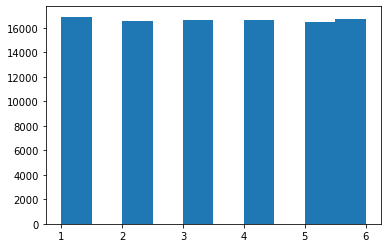

In [5]:
# 이번에는 주사위를 1000번 돌렸다고 가정해보자,

dice = []
for i in range(100000):
    dice.append(np.random.randint(1,7))

#print(dice)

plt.hist(dice)
plt.show()

# 주사위 던지는 횟수를 늘릴수록 특정한 주사위 숫자가 나오는 횟수가 전체의 1/6에 가까워진다
# 큰 수의 법칙...


In [6]:
mu, sigma = 100,15

x = mu+sigma * np.random.randn(10000)
x.shape

(10000,)

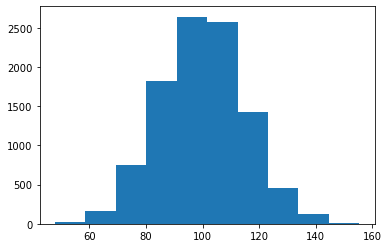

In [7]:
plt.hist(x)
plt.show()

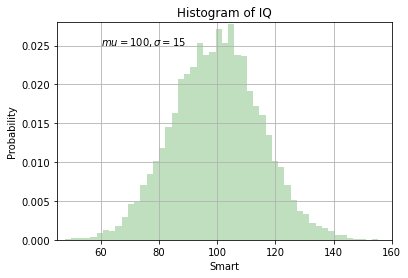

In [8]:
plt.hist(x, bins=50, 
        facecolor='g',
        density=1,
        alpha=0.25) #투명도 0~1
plt.xlabel('Smart')
plt.ylabel('Probability')

plt.grid()
plt.title('Histogram of IQ')

plt.text(60, 0.025,r'$mu=100, \sigma=15$') #r은 해석하지 말고 문자 그대로 받아들여라...
plt.axis([45, 160,0,0.028]) # x,y축의 보기 싫은 부분은 짤라낸다.
plt.show()

## Seaborn

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
# https://seaborn.pydata.org 갤러리 사이트

In [11]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods = 1000))

ts 

2000-01-01    0.255629
2000-01-02   -0.982228
2000-01-03   -0.569498
2000-01-04   -0.607230
2000-01-05   -1.284235
                ...   
2002-09-22   -0.641343
2002-09-23    1.627176
2002-09-24   -0.421578
2002-09-25    0.923233
2002-09-26   -0.637922
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

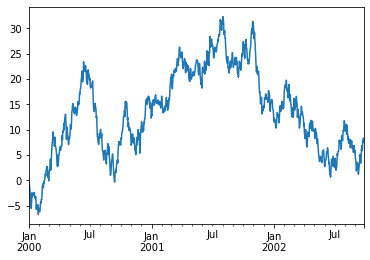

In [12]:
ts = ts.cumsum()
ts.plot() #x축으로는 2000/1/1부터 1000일 기간

<AxesSubplot:>

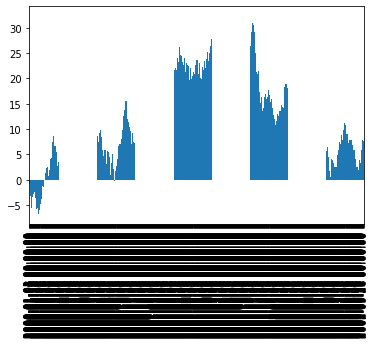

In [13]:
ts.plot(kind='bar')

## BoxPlot

In [14]:
#0~100까지 총 10개의 숫자를 만든다.
xs = np.array(np.linspace(start=0, stop=100,num=101))
xs
df = pd.DataFrame(xs, columns=['feature'])
df

,feature
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


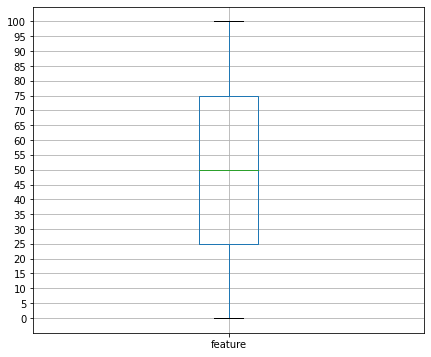

In [15]:
plt.figure(figsize=(7,6)) #크기를 지정
boxplot=df.boxplot(column=['feature'])
plt.yticks(np.arange(0,101, step=5))
plt.show()

In [16]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


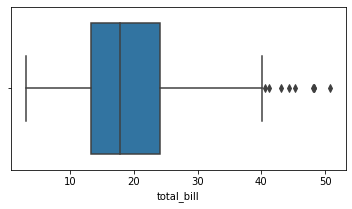

In [17]:
#total_bill값을 boxplot으로 표현해 보겠다.
plt.figure(figsize=(6,3))
sns.boxplot(x=tips['total_bill'])
plt.show()

In [18]:
tips.sort_values(by='total_bill', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

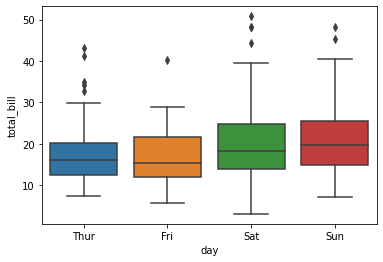

In [19]:
# 이번에는 날짜별로 데이터(total_bill)를 분석
sns.boxplot(x = 'day', y = 'total_bill', data=tips)

#평균 박스에서 중간값을 기준으로 박스의 편차 

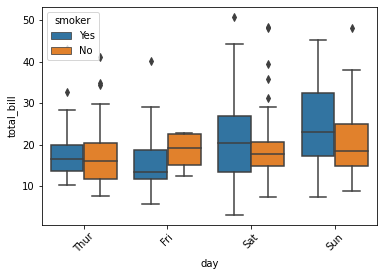

In [21]:
'''
요일별, 흡연여부별 전체음식값의 boxplot을 알아보자
즉 어느 요일에 / 흡연자 혹은 비흡연자가 음식지불액을 어떻게 지불했는지 확인
비교 - - hue
'''

sns.boxplot(x = 'day', y = 'total_bill', hue= 'smoker', data=tips)
plt.xticks(rotation=45)
plt.show()

## lmPlot

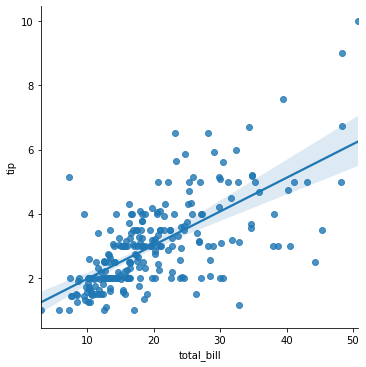

In [22]:
sns.lmplot(x='total_bill', y='tip', data=tips)

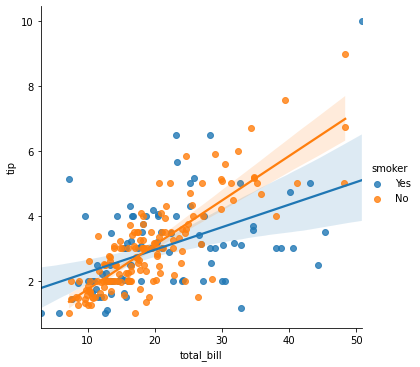

In [23]:
'''
흡연자, 비흡연자 중에서 누가 더 팁을 많이 내는가...
전체 음식 지불액을 함께 보면서...hue

'''

sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

## Heatmap

In [30]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
flights = flights.pivot(index='month',columns='year',values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


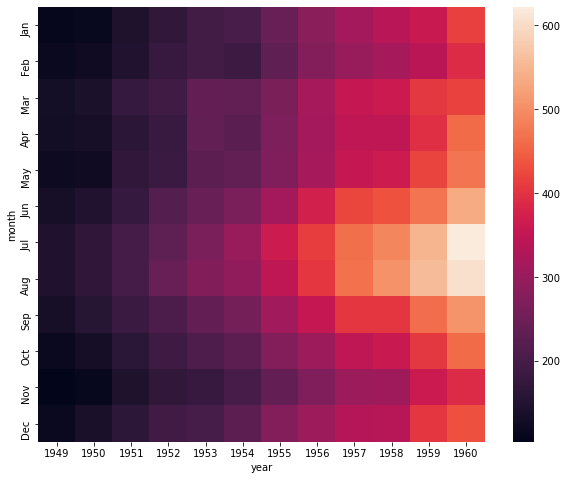

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(flights) # 디폴트는 값이 표시안된다.
plt.show()

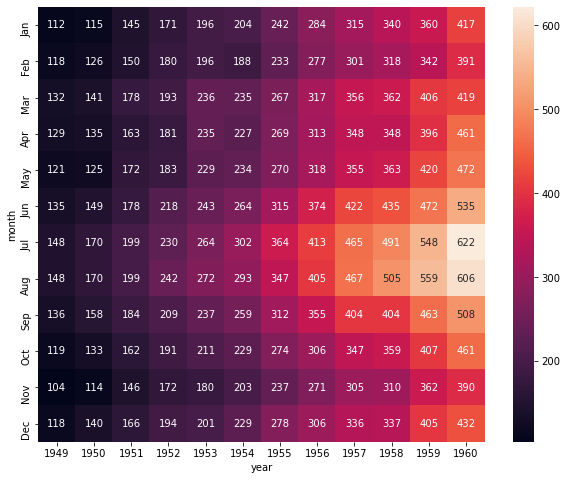

In [36]:
'''
y축은 month
x축은 year
value는 승객수
'''
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True, fmt='d') 
plt.show()